Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

1. **Загрузите файл HR.csv в pandas dataframe**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('HR.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. **Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)**

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [39]:
def stat(column):
  mean = round(column.mean(), 2)
  median = column.median()
  mode = column.mode()[0]
  std  = round(column.std(), 2)
  q3 = column.quantile(0.75)
  q1 = column.quantile(0.25)
  iqr = round((q3 - q1), 2)
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  outliers = [x for x in column if (x > upper_bound) or (x < lower_bound)]
  print(column.name)
  print('mean ', mean, '\n', 'median ', median, '\n', 'mode', mode, '\n', 'std ', std, '\n', 'iqr ', iqr, '\n', 'outliers ', outliers, '\n')

df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].apply(stat)

satisfaction_level
mean  0.61 
 median  0.64 
 mode 0.1 
 std  0.25 
 iqr  0.38 
 outliers  [] 

last_evaluation
mean  0.72 
 median  0.72 
 mode 0.55 
 std  0.17 
 iqr  0.31 
 outliers  [] 

number_project
mean  3.8 
 median  4.0 
 mode 4 
 std  1.23 
 iqr  2.0 
 outliers  [] 

average_montly_hours
mean  201.05 
 median  200.0 
 mode 135 
 std  49.94 
 iqr  89.0 
 outliers  [] 

time_spend_company
mean  3.5 
 median  3.0 
 mode 3 
 std  1.46 
 iqr  1.0 
 outliers  [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

satisfaction_level      None
last_evaluation         None
number_project          None
average_montly_hours    None
time_spend_company      None
dtype: object

In [49]:
def stat_cat(column):
  i = 0
  for val in column.values:
    if val == 1:
      i +=1
  print(f'Количество положительных исходов для {column.name}: {i} из {column.count()}')

df[['Work_accident', 'left', 'promotion_last_5years']].apply(stat_cat)

Количество положительных исходов для Work_accident: 2169 из 14999
Количество положительных исходов для left: 3571 из 14999
Количество положительных исходов для promotion_last_5years: 319 из 14999


Work_accident            None
left                     None
promotion_last_5years    None
dtype: object

3.  **Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные**

In [78]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

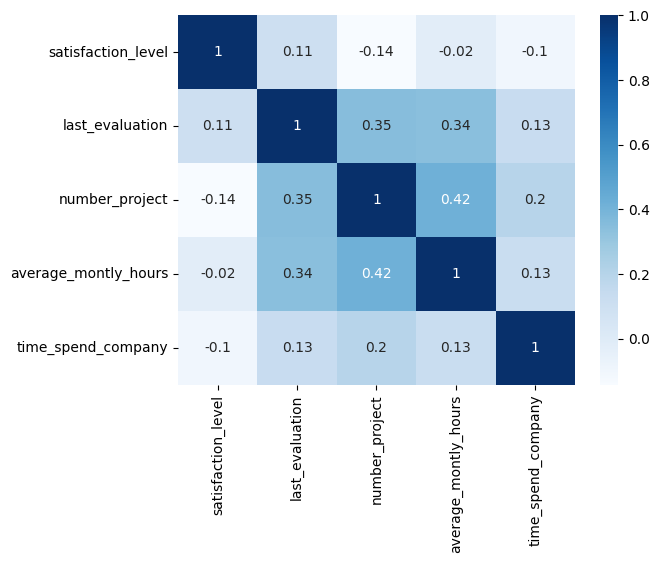

In [79]:
sns.heatmap(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(), annot=True, cmap='Blues')

По тепловой карте распределения коэффициентов корреляции видно, что самые скоррелированные переменные - это
Количество проектов (number_project) и Среднее количество часов на рабочем месте(average_montly_hours), коэффициент корреляции этих величин равен 0.42.

Самые не скоррелированнные переменные - Среднее количество часов на рабочем месте(average_montly_hours) и Уровень удовлетворенности работой (satisfaction_level) с коэффициентом корреляции -0.02.

4.  **Рассчитайте сколько сотрудников работает в каждом
департаменте**

In [52]:
department_count = df.groupby('department')['satisfaction_level'].count().sort_values(ascending=False)
dep_new = department_count.reset_index()
dep_new.columns = ['department', 'number of employees']
print(dep_new)


    department  number of employees
0        sales                 4140
1    technical                 2720
2      support                 2229
3           IT                 1227
4  product_mng                  902
5    marketing                  858
6        RandD                  787
7   accounting                  767
8           hr                  739
9   management                  630


<Axes: title={'center': 'Количество сотрудников в департаменте'}, xlabel='Количество сотрудников', ylabel='Департамент'>

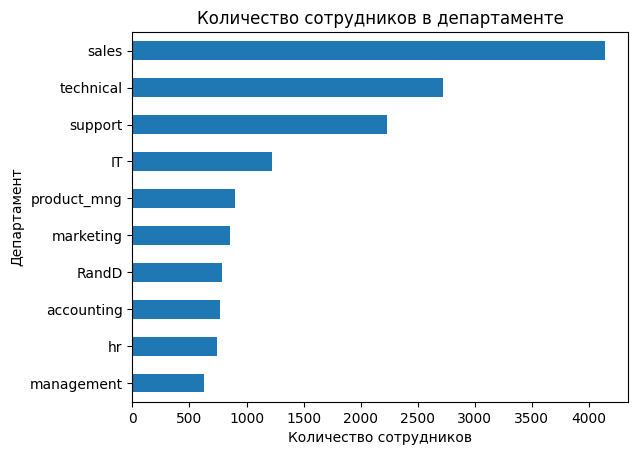

In [53]:
department_count.sort_values(ascending=True).plot(kind='barh',
                    title='Количество сотрудников в департаменте',
                    xlabel='Количество сотрудников',
                    ylabel='Департамент',
                    )


5. **Показать распределение сотрудников по зарплатам**

In [54]:
salary = df.groupby('salary', sort=False)['salary'].count()
print(salary)
sal_per = salary *100 / len(df['salary'])
print(f'\n Распределение зарплат в % \n {sal_per}')


salary
low       7316
medium    6446
high      1237
Name: salary, dtype: int64

 Распределение зарплат в % 
 salary
low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64


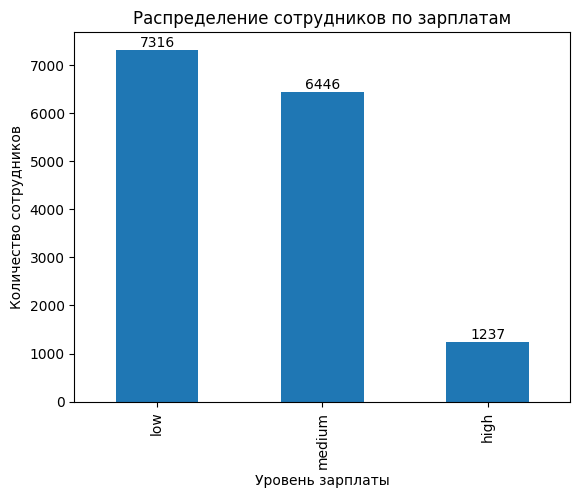

In [55]:
salary.plot(kind='bar',
                    title='Распределение сотрудников по зарплатам',
                    xlabel='Уровень зарплаты',
                    ylabel='Количество сотрудников',
                    )
for i, val in enumerate(salary.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

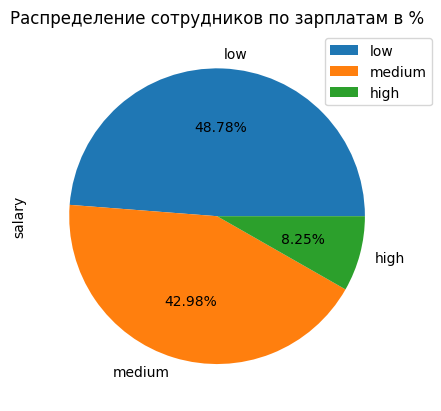

In [56]:
sal_per.plot(kind='pie',
             title='Распределение сотрудников по зарплатам в %',
             autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(0.6, 0.5, 0.5, 0.5))

Уровень зарплаты большинства сотрудников копмании низкий или средний, высокая зарплата только у 8.25 % сотрудников.

6. **Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности**

In [57]:
salary_dep = df.groupby(['department', 'salary'], sort='department')['salary'].count()
print(salary_dep)




department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64


In [58]:
salary_dep_new = df.pivot_table(
                        index=['department'],
                        columns='salary',
                        values='satisfaction_level',
                        aggfunc = 'count').fillna(0)
salary_dep_new

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<Axes: title={'center': 'Распределение сотрудников по зарплатам в каждом департаменте'}, xlabel='Департамент', ylabel='Количество сотрудников'>

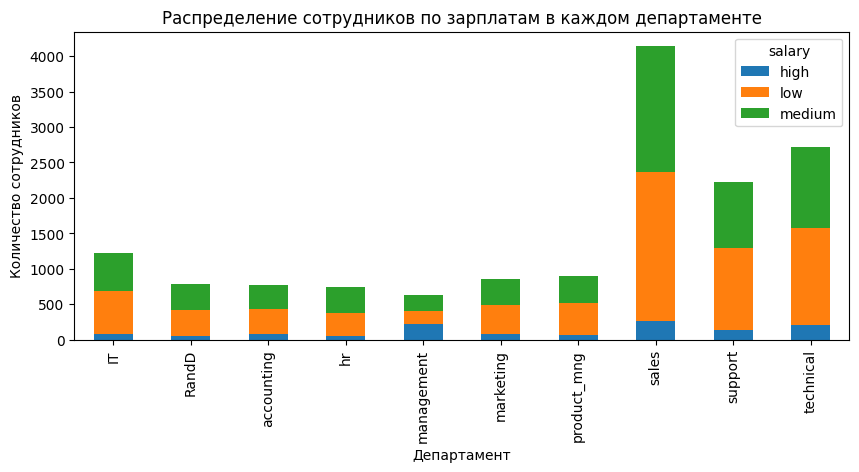

In [59]:
salary_dep_new.plot(kind='bar',
                    title='Распределение сотрудников по зарплатам в каждом департаменте',
                    xlabel='Департамент',
                    ylabel='Количество сотрудников',
                    stacked=True, figsize=(10, 4))


7.  **Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**

In [60]:
df_salary = df.loc[(df['salary'] == 'high') | (df['salary'] == 'low')].reset_index()
df_salary.groupby('salary')['average_montly_hours'].mean()

salary
high    199.867421
low     200.996583
Name: average_montly_hours, dtype: float64

Средние значения количества часов, проведенных на работе, сотрудниками с высоким и низким окладом примено одинаковы, значит выдвинутая гипотеза скорее всего не верна.

Проверим, используя тест Манна-Уитни. За нулевую гипотезу возьмем то, что сотрудники с разным окладом проводят на работе примерно одинаковое количество часов.

In [61]:
import scipy.stats as st
df_salary_high = df.loc[(df['salary'] == 'high')]
df_salary_low = df.loc[(df['salary'] == 'low')]

stat, p = st.mannwhitneyu(df_salary_high['average_montly_hours'], df_salary_low['average_montly_hours'])
if p > 0.05:
  print(p, '- сотрудники с высоким окладом не проводят на работе больше времени, чем сотрудники с низким окладом')
else:
  print(p, '- сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')

0.8241330720858693 - сотрудники с высоким окладом не проводят на работе больше времени, чем сотрудники с низким окладом


8. **Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):**

- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [62]:
df_promotion = df.groupby(['left', 'promotion_last_5years'])['promotion_last_5years'].count() * 100 /df.groupby('left')['promotion_last_5years'].count()

print('Доля сотрудников с повышением за последние 5 лет среди уволившихся и не уволившихся сотрудников \n')
print(df_promotion )


Доля сотрудников с повышением за последние 5 лет среди уволившихся и не уволившихся сотрудников 

left  promotion_last_5years
0     0                        97.374869
      1                         2.625131
1     0                        99.467936
      1                         0.532064
Name: promotion_last_5years, dtype: float64


In [63]:
df.groupby('left').agg({'satisfaction_level': 'mean', 'number_project': 'mean'})


,satisfaction_level,number_project
left,,
0,0.666810,3.786664
1,0.440098,3.855503


Доля сотрудников, получивших повышение, среди не уволившихся (2.62 %) немного выше, чем у уволившихся (0.5 %).

Средняя степень удовлетворенности уволившихся сотрудников ниже, чем у не уволившихся.

Среднее количество проектов в двух группах примерно одинаковое.

9. **Разделить данные на тестовую и обучающую выборки**

**Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)**

**Оценить качество модели на тестовой выборке**

In [64]:
data = df.iloc[:, [0, 1, 2, 3, 4, 5, 7]]
data_class = df['left'].to_numpy()
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


In [66]:
#обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [67]:
#прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [68]:
#сравнение фактических данных и прогноза
result = pd.DataFrame((y_test, lda.predict(X_test))).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [69]:
#точность модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7536

Точность модели не очень высокая - чуть больше 75%

In [70]:
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
        -1.10730495e+00]])

В массиве коэффициентов дискриминантных линий можно найти признаки, которые максимально влияют на зависимую переменную (left), это, например, satisfaction_level, last_evaluation, average_montly_hours